# Chemical Physics Lab with Python: Enthalpy of Vaporization Calculation

## Objective
In this notebook we will to analyze the data from a typical chemical physics lab using Python libraries (Numpy, Matplotlib and Scikit-learn). Our main objective is to calcule the enthalpy of vaporization for water by  applying the Clausius-Clapeyron equation.

Since it's not the purpose of this notebook to deeply understand and discuss the fundamentals of the chemical physics concepts needed to do this lab experiment, we assume basic knowledge of the concepts involved.


## Introduction
The enthalpy of vaporization is the amount of energy that must be added to transform a substance from its liquid state into a gas state. In this process, the molecules in the liquid require energy to overcome the attractive forces between the molecules, and to gain enough kinetic energy to escape into the gas phase. The enthalpy of vaporization can be considered constant for small temperature ranges.

If we considere a liquid sampe of a pure substance in a closed cointainer, the preassure of the vapor in equilibrium with the liquid is called the vapor pressure. The vapor pressure depends on the nature of the liquid and increases with temperature until the critical temperature is reached. The Clausius-Clapeyron equation expresses the variation of the vapor pressure with temperature.

$$ \frac{\partial P}{\partial T} = \frac{P \Delta_{vap} H}{R T^2} $$ 

The indefinite integration of the previous equation leads to:

$$ \ln P = - \frac{\Delta_{vap} H}{R T}
+ cte $$

where $P$ is vapor preassure, $\Delta_{vap} H$ is the enthalpy of vaporization, $R$ is the gas constant, $T$ is the temperature and $cte$ is the constant of integration.

Note: In the derivation of the previous equation, we considered that the volume of the liquid is negligible compared to the volume of the vapor (Clausius approximation), also that the enthalpy of vaporization of the liquid is constant in the range of temperature, and that vapor behaves as an ideal gas.



Finally, we will calculate the percent error which is the relative error expressed as a percentage. The relative error is the discrepancy between the exact value and our approximation to it and is calculated by dividing the absolute difference between the approximate value and the true value by the magnitude of the true value.

$$ E_r\% = \frac{|Predicted~Value - True~Value|}{True~Value} * 100 $$

## Procedure

As we mentioned before, we will not detail the series of steps needed to obtein all the experimental data. Instead, we will just report resulting values of the measurements taken, which include room temperature, atmospheric preassure, initial volume of the air inside the test tube and temperature at different volumes.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt   
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data from the CSV file
df=pd.read_csv('/home/alejandrito/mydata/Python/Github/Chemical Physics Lab/Lab_data.csv')

In [3]:
# A quick look to the CSV file
df.head()

,V,T
0,3.3,60
1,3.4,62
2,3.5,64
3,3.6,66
4,3.7,67


In [4]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       19 non-null     float64
 1   T       19 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 432.0 bytes


In [5]:
# Change volume units from mL to L
V = df['V'] / 1000
print(V)

0     0.0033
1     0.0034
2     0.0035
3     0.0036
4     0.0037
5     0.0038
6     0.0039
7     0.0040
8     0.0041
9     0.0042
10    0.0043
11    0.0044
12    0.0045
13    0.0046
14    0.0047
15    0.0048
16    0.0049
17    0.0050
18    0.0051
Name: V, dtype: float64


In [6]:
#Change temperature units from degree Celsius to Kelvin
T = df['T'] + 273.15
print(T)

0     333.15
1     335.15
2     337.15
3     339.15
4     340.15
5     342.15
6     343.15
7     344.15
8     345.15
9     346.15
10    347.15
11    348.15
12    348.15
13    349.15
14    350.15
15    351.15
16    351.15
17    352.15
18    352.15
Name: T, dtype: float64


We can calculate the inicial number of mols of air inside the test tube (considering the $P_{vap}$ negligible at room temperature) using the ideal gas equation:

$$ n_{air} = \frac{P_{atm}V} {RT}$$

And the $P_{air}$ at each temperature:

$$ P_{air} = \frac{n_{air}RT}{V} $$

In [7]:
# Calculate the number of mols of air 
P_atm = 1 # atm
T_room = 295 # K
V_initial = 0.0023 # L
R = 0.082 # Gas constant in atm L / (K mol)
n_air = (P_atm * V_initial) / (R * T_room )
print(f'Number of initial air mols: {n_air:.6f}')

# Calculate the air pressure at each temperature
P_air = (n_air * R * T[:]) / V[:]

Number of initial air mols: 0.000095


Then we calculate the air pressure at different temperatures (considering pressure inside the test tube constant and equal to the atmospheric pressure) with the following equation:

$P_{vap} = P_{atm} - P_{air}$

In [8]:
# Calculate the vapor pressure of water at each temperature
P_vap = P_atm - P_air

In [9]:
# Compute the natural logarithm of the vapor pressure
ln_P_vap = np.log(P_vap)

In [10]:
# Transform temperature into 1/T
T_inv = 1000  / T[:]

In [11]:
# Train the linear regression model
model = LinearRegression()
# Reshape the input data for the linear regression model using the 'reshape' function to ensure compatibility with scikit-learn's 'LinearRegression' class
model.fit(T_inv.values.reshape(-1,1),ln_P_vap.values)
# Make predictions using the trained model
ln_P_vap_pred = model.predict(T_inv.values.reshape(-1,1))

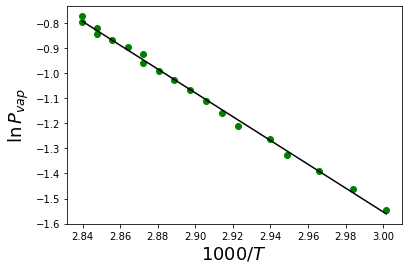

In [12]:
#Plot the data and the regression line
plt.scatter(T_inv, ln_P_vap,color='g')
plt.plot(T_inv, ln_P_vap_pred,color='k')
plt.ylabel(r'$\lnP_{vap}$',fontweight = 'bold', fontsize=18)
plt.xlabel(r'$1000/T$',fontweight = 'bold', fontsize=18)
plt.show()

In [13]:
# Enthalpy of vaporization
R = 8.314 # Gas constant in J/(K mol)
deltaH = - 1000 * R * model.coef_
print(f'Enthalpy of vaporization: {float(deltaH):.1f}')

Enthalpy of vaporization: 39489.6


The real value for the enthalpy of vaporization at 70&deg;C which is the mean of the range of temperatures is 40656 J/mol.

In [14]:
# The real value for the enthalpy of vaporization at 70°C which is the median of the range of temperatures is 40656 J/mol.
True_value = 40656 # J/(k mol)
# Calculate the relative error

Rel_error = 100 * (abs(deltaH - True_value)) / True_value
print(f'Percent error : {float(Rel_error):.2f}')

Percent error : 2.87


This is generally considered to be a small error and indicates that our prediction is fairly accurate.

## Conclusion

In this notebook we used Python to perform various calculations, such as converting volume units from mL to L, and temperature units from Celsius to Kelvin. We can calculated the initial number of moles of air inside the test tube using the ideal gas equation and then compute the air pressure at each temperature. Next, we used the air pressure at each temperature to calculate the vapor pressure of water using the equation P_vap = P_atm - P_air. We then computed the natural logarithm of the vapor pressure and transformed temperature into 1/T. Finally, we trained a linear regression model using Scikit-learn's "LinearRegression" class and plotted the data and the regression line. From this, we obtained the enthalpy of vaporization using the Clausius-Clapeyron equation, and calculated the percent error between our approximation and the exact value.